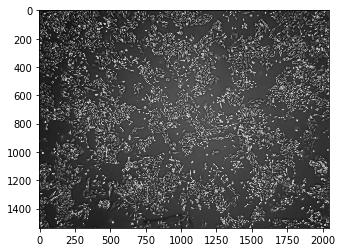

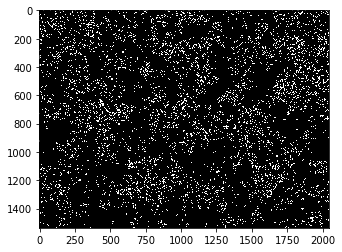

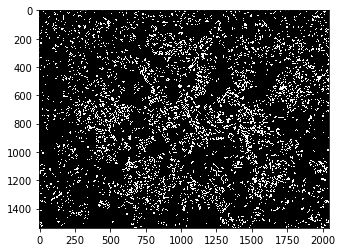

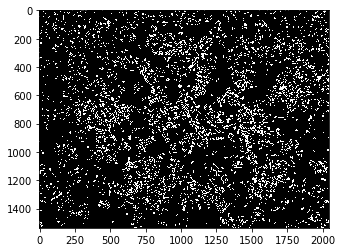

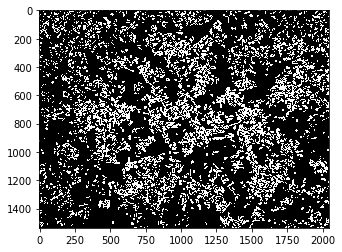

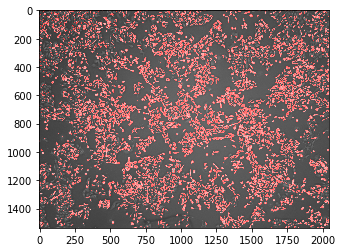

cell density: 22.713%


In [47]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.ndimage
import cv2

from sklearn.cluster import KMeans

img = cv2.imread('real_cells1.png',0)
plt.imshow(img, cmap='gray')
plt.show()

img_blurr = cv2.GaussianBlur(img, (5, 5), 0)

canny = cv2.Canny(img, 80, 120)
plt.imshow(canny, cmap='gray')
plt.show()

flat = np.copy(img).flatten()
median = np.median(flat)
std = flat.std()
cells = np.zeros_like(img)
for i in range(1, cells.shape[0] - 1):
    for j in range(1, cells.shape[1] - 1):
        cells[i][j] = 0 
        if (img_blurr[i][j] > median + std or img_blurr[i][j] < median - std) and np.sum(canny[i-1:i+2, j-1:j+2]) > 3:
            cells[i][j] = 1
plt.imshow(cells, cmap='gray')
plt.show()

cell_cvx = np.copy(cells)
for i in range(1, cells.shape[0] - 1):
    for j in range(1, cells.shape[1] - 1):
        cell_cvx[i][j] = 255 if cells[i][j] == 1 or np.sum(cells[i-1:i+2, j-1:j+2]) > 6 else 0
plt.imshow(cell_cvx, cmap='gray')
plt.show()

cell_cvx_new = cell_cvx.copy()
for i in range(1, cell_cvx.shape[0] - 1):
    for j in range(1, cell_cvx.shape[1] - 1):
        cell_cvx_new[i][j] = 255 if cell_cvx[i][j] == 1 or np.sum(cell_cvx[i-1:i+2, j-1:j+2]) > 6 else 0
plt.imshow(cell_cvx_new, cmap='gray')
plt.show()

cell_lab_on_pic = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.int16)
cell_lab_on_pic[:, :, 0] = np.maximum(img, cell_cvx_new)
cell_lab_on_pic[:, :, 1] = img
cell_lab_on_pic[:, :, 2] = img
plt.imshow(cell_lab_on_pic, cmap='gray')
plt.show()

density = np.sum(cell_cvx_new/255) / ((cell_cvx_new.shape[0]-2) * (cell_cvx_new.shape[1]-2))
print('cell density: %.3f%%' % (density*100))